# Data Analysis Mathematics, Algorithms and Modeling

## Team Information - **Group Presentation 3**

**Team Members**

Name: Ayush Patel  
Student Number: 9033358

Name: Nikhil Shankar  
Student Number: 9026254

Name: Sreehari Prathap  
Student Number: 8903199


## Step 1: Install and Configure the IDE (e.g., Jupyter Notebook and VS Code)
- Install Anaconda (for Jupyter Notebook) and Visual Studio Code (VS Code).
  - Anaconda: Visit [anaconda.com](https://www.anaconda.com/products/individual) and download the appropriate installer for your operating system.
  - VS Code: Download and install from [Visual Studio Code](https://code.visualstudio.com/).
- Install Pandas Library
  - Open the terminal and run the following command: `pip install pandas`

## Step 2: Downloading the Dataset
We are using the Utrecht Fairness Recruitment dataset from [Kaggle], which can be downloaded directly via the link:
- URL: [https://www.kaggle.com/datasets/ictinstitute/utrecht-fairness-recruitment-dataset]

## Step 3 : Data Cleansing

### Data Cleansing Process for User Data (Talent Acquisition) from a CSV File

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

file = "../data/Salary_Data.csv"
df_unfiltered = pd.read_csv(file)
row_count = len(df_unfiltered)

print("Total number of datapoints(rows)", row_count)

Total number of datapoints(rows) 6704


##### Removing empty valued rows from the dataset
By giving axis as 0 we filter rows with any empty values. 

In [34]:
# Drop rows with any missing values
df = df_unfiltered.dropna(axis=0, how='any')

# Replace similar education levels to have uniformity using .loc
df.loc[:, 'Education Level'] = df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "PhD": "phD"
})

df['Year Hired'] = (2022 - df['Years of Experience']).astype(int)

job_category_mapping = {
    'Software Engineer': 'Engineering & Software Development',
    'Data Analyst': 'Data Science, Analytics, and BI',
    'Senior Manager': 'Management',
    'Sales Associate': 'Sales & Business Development',
    'Director': 'Management',
    'Marketing Analyst': 'Marketing & Sales',
    'Product Manager': 'Product Management',
    'Sales Manager': 'Sales & Business Development',
    'Marketing Coordinator': 'Marketing & Sales',
    'Senior Scientist': 'Research & Development',
    'Software Developer': 'Engineering & Software Development',
    'HR Manager': 'Human Resources',
    'Financial Analyst': 'Finance & Accounting',
    'Project Manager': 'Project Management',
    'Customer Service Rep': 'Customer Service',
    'Operations Manager': 'Operations',
    'Marketing Manager': 'Marketing & Sales',
    'Senior Engineer': 'Engineering & Software Development',
    'Data Entry Clerk': 'Administrative Support',
    'Sales Director': 'Sales & Business Development',
    'Business Analyst': 'Business Analysis',
    'VP of Operations': 'Management',
    'IT Support': 'Information Technology',
    'Recruiter': 'Human Resources',
    'Financial Manager': 'Finance & Accounting',
    'Social Media Specialist': 'Marketing & Sales',
    'Software Manager': 'Engineering & Software Development',
    'Junior Developer': 'Engineering & Software Development',
    'Senior Consultant': 'Consulting',
    'Product Designer': 'Design',
    'CEO': 'Executive Management',
    'Accountant': 'Finance & Accounting',
    'Data Scientist': 'Data Science, Analytics, and BI',
    'Marketing Specialist': 'Marketing & Sales',
    'Technical Writer': 'Technical Communication',
    'HR Generalist': 'Human Resources',
    'Project Engineer': 'Engineering & Software Development',
    'Customer Success Rep': 'Customer Service',
    'Sales Executive': 'Sales & Business Development',
    'UX Designer': 'Design',
    'Operations Director': 'Management',
    'Network Engineer': 'Engineering & IT',
    'Administrative Assistant': 'Administrative Support',
    'Strategy Consultant': 'Consulting',
    'Copywriter': 'Marketing & Sales',
    'Account Manager': 'Sales & Business Development',
    'Director of Marketing': 'Marketing & Sales',
    'Help Desk Analyst': 'Information Technology',
    'Customer Service Manager': 'Customer Service',
    'Business Intelligence Analyst': 'Data Science, Analytics, and BI',
    'Event Coordinator': 'Administrative Support',
    'VP of Finance': 'Management',
    'Graphic Designer': 'Design',
    'UX Researcher': 'Design',
    'Social Media Manager': 'Marketing & Sales',
    'Director of Operations': 'Management',
    'Senior Data Scientist': 'Data Science, Analytics, and BI',
    'Junior Accountant': 'Finance & Accounting',
    'Digital Marketing Manager': 'Marketing & Sales',
    'IT Manager': 'Information Technology',
    'Customer Service Representative': 'Customer Service',
    'Business Development Manager': 'Sales & Business Development',
    'Senior Financial Analyst': 'Finance & Accounting',
    'Web Developer': 'Engineering & Software Development',
    'Research Director': 'Research & Development',
    'Technical Support Specialist': 'Information Technology',
    'Creative Director': 'Creative & Design',
    'Senior Software Engineer': 'Engineering & Software Development',
    'Human Resources Director': 'Human Resources',
    'Content Marketing Manager': 'Marketing & Sales',
    'Technical Recruiter': 'Human Resources',
    'Sales Representative': 'Sales & Business Development',
    'Chief Technology Officer': 'Executive Management',
    'Junior Designer': 'Design',
    'Financial Advisor': 'Finance & Accounting',
    'Junior Account Manager': 'Sales & Business Development',
    'Senior Project Manager': 'Project Management',
    'Principal Scientist': 'Research & Development',
    'Supply Chain Manager': 'Operations',
    'Senior Marketing Manager': 'Marketing & Sales',
    'Training Specialist': 'Training & Development',
    'Research Scientist': 'Research & Development',
    'Junior Software Developer': 'Engineering & Software Development',
    'Public Relations Manager': 'Marketing & Communications',
    'Operations Analyst': 'Operations',
    'Product Marketing Manager': 'Marketing & Sales',
    'Senior HR Manager': 'Human Resources',
    'Junior Web Developer': 'Engineering & Software Development',
    'Senior Project Coordinator': 'Project Management',
    'Chief Data Officer': 'Executive Management',
    'Digital Content Producer': 'Creative & Design',
    'IT Support Specialist': 'Information Technology',
    'Senior Marketing Analyst': 'Marketing & Sales',
    'Customer Success Manager': 'Customer Service',
    'Senior Graphic Designer': 'Design',
    'Software Project Manager': 'Project Management',
    'Supply Chain Analyst': 'Operations',
    'Senior Business Analyst': 'Business Analysis',
    'Junior Marketing Analyst': 'Marketing & Sales',
    'Office Manager': 'Administrative Support',
    'Principal Engineer': 'Engineering & Software Development',
    'Junior HR Generalist': 'Human Resources',
    'Senior Product Manager': 'Product Management',
    'Junior Operations Analyst': 'Operations',
    'Senior HR Generalist': 'Human Resources',
    'Sales Operations Manager': 'Sales & Business Development',
    'Junior Web Designer': 'Design',
    'Senior Training Specialist': 'Training & Development',
    'Senior Research Scientist': 'Research & Development',
    'Junior Sales Representative': 'Sales & Business Development',
    'Junior Marketing Manager': 'Marketing & Sales',
    'Junior Data Analyst': 'Data Science, Analytics, and BI',
    'Senior Product Marketing Manager': 'Marketing & Sales',
    'Junior Business Analyst': 'Business Analysis',
    'Senior Sales Manager': 'Sales & Business Development',
    'Junior Marketing Specialist': 'Marketing & Sales',
    'Junior Project Manager': 'Project Management',
    'Senior Accountant': 'Finance & Accounting',
    'Director of Sales': 'Sales & Business Development',
    'Junior Recruiter': 'Human Resources',
    'Senior Business Development Manager': 'Sales & Business Development',
    'Senior Product Designer': 'Design',
    'Junior Customer Support Specialist': 'Customer Service',
    'Senior IT Support Specialist': 'Information Technology',
    'Junior Financial Analyst': 'Finance & Accounting',
    'Senior Operations Manager': 'Operations',
    'Director of Human Resources': 'Human Resources',
    'Junior Software Engineer': 'Engineering & Software Development',
    'Senior Sales Representative': 'Sales & Business Development',
    'Director of Product Management': 'Product Management',
    'Junior Copywriter': 'Marketing & Sales',
    'Senior Marketing Coordinator': 'Marketing & Sales',
    'Senior Human Resources Manager': 'Human Resources',
    'Junior Business Development Associate': 'Sales & Business Development',
    'Senior Account Manager': 'Sales & Business Development',
    'Senior Researcher': 'Research & Development',
    'Junior HR Coordinator': 'Human Resources',
    'Director of Finance': 'Finance & Accounting',
    'Junior Marketing Coordinator': 'Marketing & Sales',
    'Junior Data Scientist': 'Data Science, Analytics, and BI',
    'Senior Operations Analyst': 'Operations',
    'Senior Human Resources Coordinator': 'Human Resources',
    'Senior UX Designer': 'Design',
    'Junior Product Manager': 'Product Management',
    'Senior Marketing Specialist': 'Marketing & Sales',
    'Senior IT Project Manager': 'Project Management',
    'Senior Quality Assurance Analyst': 'Quality Assurance',
    'Director of Sales and Marketing': 'Management',
    'Senior Account Executive': 'Sales & Business Development',
    'Director of Business Development': 'Sales & Business Development',
    'Junior Social Media Manager': 'Marketing & Sales',
    'Senior Human Resources Specialist': 'Human Resources',
    'Senior Data Analyst': 'Data Science, Analytics, and BI',
    'Director of Human Capital': 'Executive Management',
    'Junior Advertising Coordinator': 'Marketing & Sales',
    'Junior UX Designer': 'Design',
    'Senior Marketing Director': 'Marketing & Sales',
    'Senior IT Consultant': 'Information Technology',
    'Senior Financial Advisor': 'Finance & Accounting',
    'Junior Business Operations Analyst': 'Operations',
    'Junior Social Media Specialist': 'Marketing & Sales',
    'Senior Product Development Manager': 'Product Management',
    'Junior Operations Manager': 'Operations',
    'Senior Software Architect': 'Engineering & Software Development',
    'Junior Research Scientist': 'Research & Development',
    'Senior Financial Manager': 'Finance & Accounting',
    'Senior HR Specialist': 'Human Resources',
    'Senior Data Engineer': 'Engineering & Software Development',
    'Junior Operations Coordinator': 'Operations',
    'Director of HR': 'Human Resources',
    'Senior Operations Coordinator': 'Operations',
    'Junior Financial Advisor': 'Finance & Accounting',
    'Director of Engineering': 'Engineering & Software Development',
    'Software Engineer Manager': 'Engineering & Software Development',
    'Back end Developer': 'Engineering & Software Development',
    'Senior Project Engineer': 'Engineering & Software Development',
    'Full Stack Engineer': 'Engineering & Software Development',
    'Front end Developer': 'Engineering & Software Development',
    'Front End Developer': 'Engineering & Software Development',
    'Director of Data Science': 'Data Science, Analytics, and BI',
    'Human Resources Coordinator': 'Human Resources',
    'Junior Sales Associate': 'Sales & Business Development',
    'Human Resources Manager': 'Human Resources',
    'Juniour HR Generalist': 'Human Resources',
    'Juniour HR Coordinator': 'Human Resources',
    'Digital Marketing Specialist': 'Marketing & Sales',
    'Receptionist': 'Administrative Support',
    'Marketing Director': 'Marketing & Sales',
    'Social Media Man': 'Marketing & Sales',
    'Delivery Driver': 'Transportation & Logistics'
}

categories2 = {
    "Engineering & Software Development": "Engineering & IT",
    "Information Technology": "Engineering & IT",
    "Technical Communication": "Engineering & IT",
    "Engineering & IT": "Engineering & IT",
    
    "Data Science, Analytics, and BI": "Data & Business Intelligence",
    "Business Analysis": "Data & Business Intelligence",
    
    "Management": "Management & Leadership",
    "Project Management": "Management & Leadership",
    "Executive Management": "Management & Leadership",
    
    "Sales & Business Development": "Sales & Marketing",
    "Marketing & Sales": "Sales & Marketing",
    "Marketing & Communications": "Sales & Marketing",
    
    "Product Management": "Product & R&D",
    "Research & Development": "Product & R&D",
    
    "Operations": "Operations & Support",
    "Administrative Support": "Operations & Support",
    "Customer Service": "Operations & Support",
    "Transportation & Logistics": "Operations & Support",
    
    "Design": "Design & Creativity",
    "Creative & Design": "Design & Creativity",
    
    "Finance & Accounting": "Finance & HR",
    "Human Resources": "Finance & HR",
    "Training & Development": "Finance & HR",
    
    "Consulting": "Consulting & Quality",
    "Quality Assurance": "Consulting & Quality"
}


# Map job titles to categories
df['Job Category'] = df['Job Title'].map(job_category_mapping)
df['Job Category 2'] = df['Job Category'].map(categories2)

print(df.info())


print(df['Education Level'].unique())
print(df['Job Title'].unique())
print(df['Year Hired'].unique())
print(df['Job Category 2'].unique())

top_job_categories = df['Job Category 2'].value_counts().nlargest(3).index
df = df[df['Job Category 2'].isin(top_job_categories)]
display(df)
print(len(df))
print(df.describe())
display(df['Age'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
 6   Year Hired           6698 non-null   int32  
 7   Job Category         6695 non-null   object 
 8   Job Category 2       6695 non-null   object 
dtypes: float64(3), int32(1), object(5)
memory usage: 497.1+ KB
None
["Bachelor's" "Master's" 'phD' 'High School']
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Year Hired,Job Category,Job Category 2
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,2017,Engineering & Software Development,Engineering & IT
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,2019,"Data Science, Analytics, and BI",Data & Business Intelligence
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,2015,Sales & Business Development,Sales & Marketing
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,2020,Marketing & Sales,Sales & Marketing
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,2018,Sales & Business Development,Sales & Marketing
...,...,...,...,...,...,...,...,...,...
6698,37.0,Male,Bachelor's,Junior Sales Representative,6.0,75000.0,2016,Sales & Business Development,Sales & Marketing
6699,49.0,Female,phD,Director of Marketing,20.0,200000.0,2002,Marketing & Sales,Sales & Marketing
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,2019,Sales & Business Development,Sales & Marketing
6702,46.0,Male,Master's,Marketing Manager,14.0,140000.0,2008,Marketing & Sales,Sales & Marketing


5142
               Age  Years of Experience         Salary   Year Hired
count  5142.000000          5142.000000    5142.000000  5142.000000
mean     33.696033             8.133217  117000.872618  2013.866005
std       8.059011             6.339312   52711.558525     6.338513
min      21.000000             0.000000     550.000000  1988.000000
25%      28.000000             3.000000   70000.000000  2010.000000
50%      31.000000             6.000000  115000.000000  2016.000000
75%      38.000000            12.000000  160732.000000  2019.000000
max      62.000000            34.000000  240000.000000  2022.000000


Age
27.0    427
29.0    384
30.0    375
28.0    375
26.0    319
31.0    282
33.0    269
32.0    224
25.0    215
36.0    195
24.0    180
34.0    161
43.0    131
35.0    127
42.0    119
45.0    119
37.0    116
41.0    109
44.0     99
23.0     97
46.0     95
38.0     95
48.0     93
49.0     86
39.0     80
50.0     80
54.0     68
40.0     44
47.0     39
52.0     27
51.0     26
21.0     18
55.0     16
56.0     11
57.0      9
53.0      7
58.0      7
22.0      6
62.0      5
60.0      5
61.0      2
Name: count, dtype: int64

We understand that there are no rows with empty values. The dataset is now filtered for analysis so we can proceed to the next step. 

Job Category 2
Engineering & IT                2666
Sales & Marketing               1492
Data & Business Intelligence     984
Name: count, dtype: int64


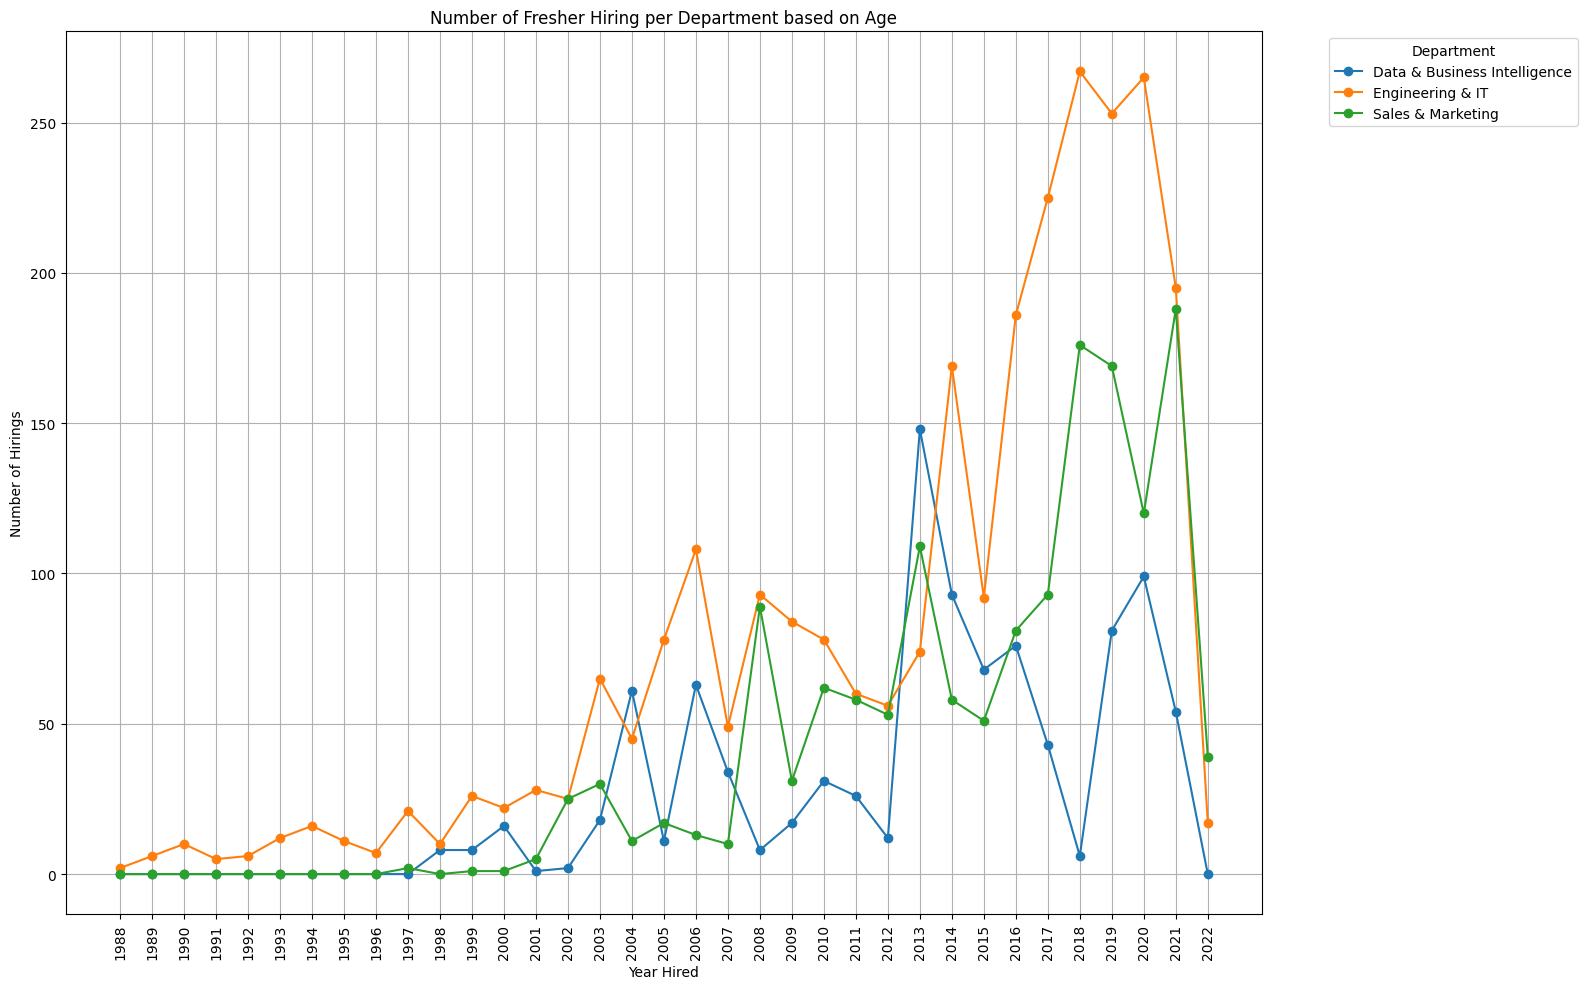

In [8]:
print(df['Job Category 2'].value_counts(ascending=False))

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and has a 'Department' column along with 'Year Hired'
# First, group the data by 'Department' and 'Year Hired' to get the counts
hirings_per_department = df.groupby(['Job Category 2', 'Year Hired']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(16, 10))
for department in hirings_per_department.index:
    plt.plot(hirings_per_department.columns, hirings_per_department.loc[department], marker='o', label=department)

plt.title('Number of Fresher Hiring per Department based on Age')
plt.xlabel('Year Hired')
plt.ylabel('Number of Hirings')
plt.xticks(rotation=90)
plt.xticks(hirings_per_department.columns)  # Show all years on the x-axis
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [9]:
df['Job Category'].unique()

array(['Engineering & Software Development',
       'Data Science, Analytics, and BI', 'Sales & Business Development',
       'Marketing & Sales', 'Business Analysis', 'Information Technology',
       'Technical Communication', 'Engineering & IT',
       'Marketing & Communications'], dtype=object)

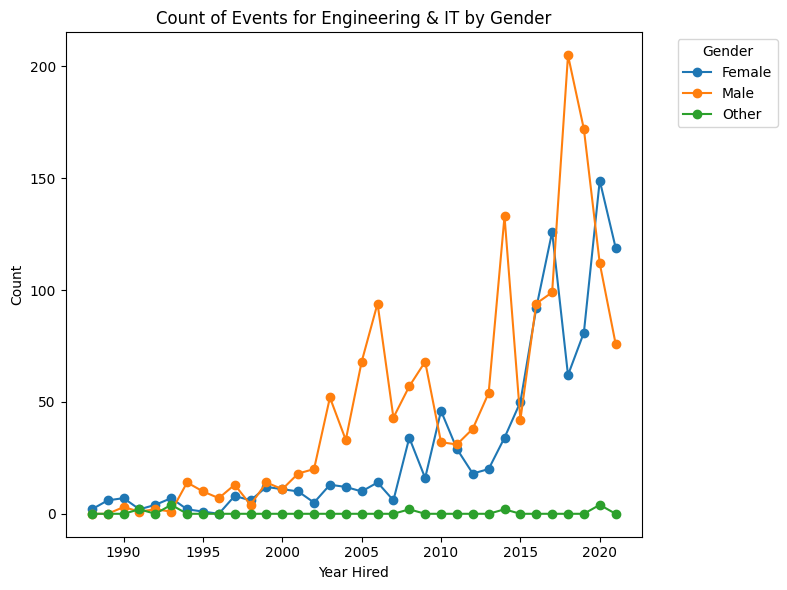

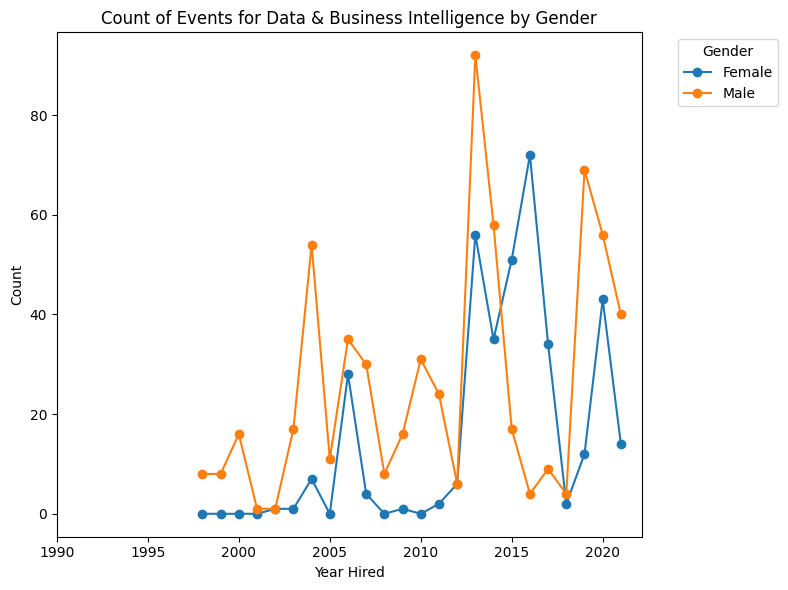

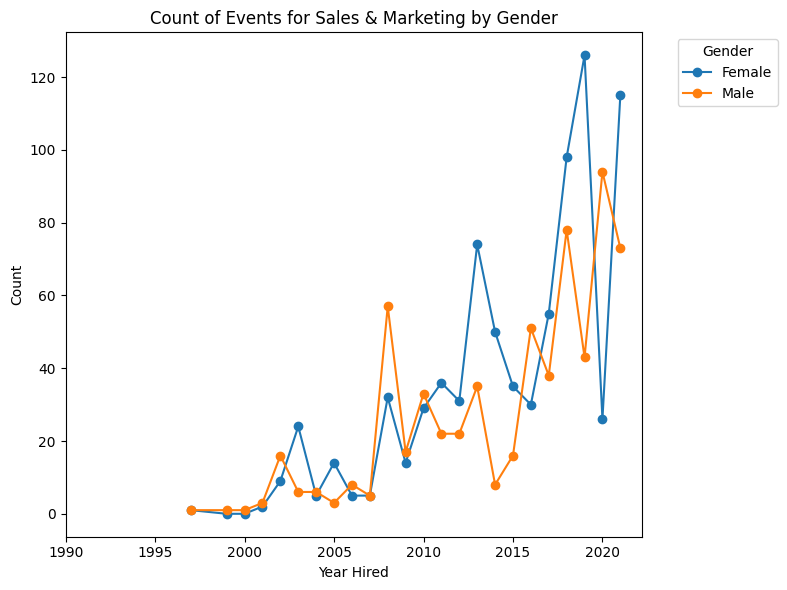

In [30]:



plot_gender_industry = GenderIndustryPlotter(df)
plot_gender_industry.plot_industry_data()

#### **Calculating & Plotting Moving Average**

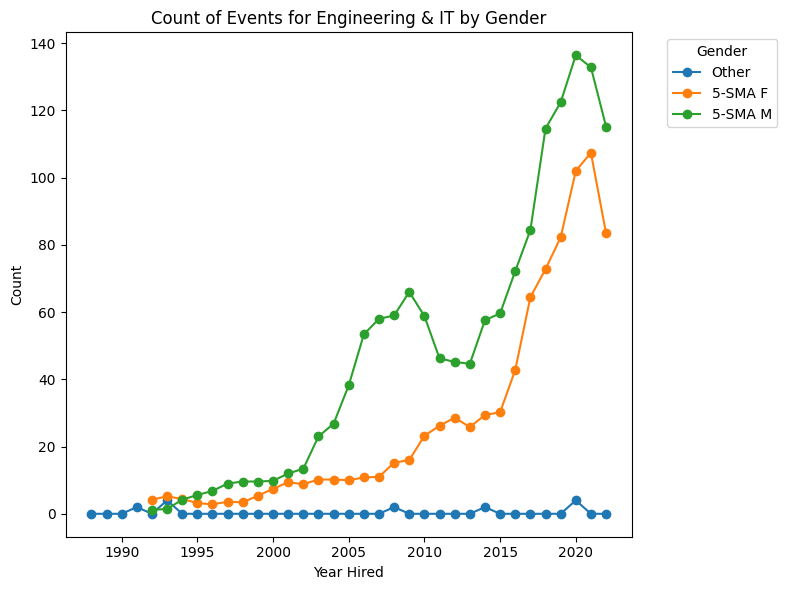

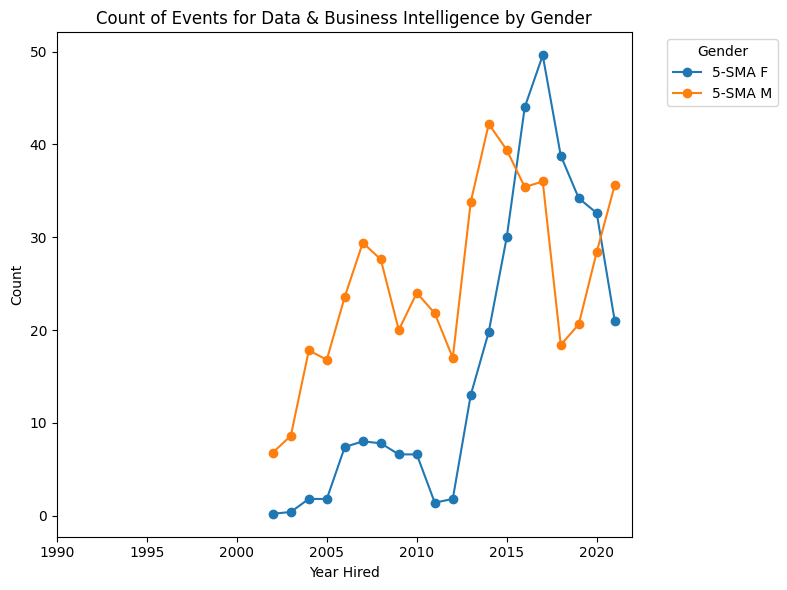

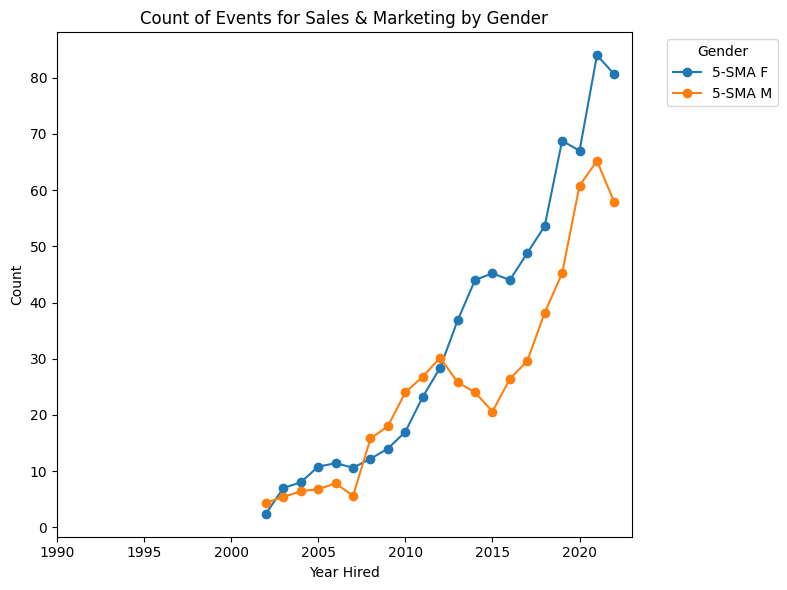

In [31]:
# Loop through each unique Job Category to create separate graphs
class MovingAveragePlotter:
    def __init__(self, dataframe):
        """Initialize with the DataFrame."""
        self.df = dataframe

    def plot_industry_data(self):
        """Loop through industries and plot gender-based moving averages."""
        for industry in self.df['Job Category 2'].unique():
            pivoted = self._prepare_data(industry)
            self._plot_graph(pivoted, industry)
            return pivoted

    def _prepare_data(self, industry):
        """Prepare and pivot the data for the given industry."""
        # Filter data for the current industry
        industry_data = self.df[self.df['Job Category 2'] == industry]
        # Group and count occurrences by Year Hired and Gender
        grouped = industry_data.groupby(['Year Hired', 'Gender']).size().reset_index(name='Count')
        # Pivot the data to have Gender as columns
        pivoted = grouped.pivot(index='Year Hired', columns='Gender', values='Count').fillna(0)
        # Calculate 5-period simple moving averages for Female and Male
        pivoted['5-SMA F'] = pivoted['Female'].rolling(window=5).mean()
        pivoted['5-SMA M'] = pivoted['Male'].rolling(window=5).mean()
        # Drop the original Female and Male columns
        return pivoted.drop(['Female', 'Male'], axis=1)

    def _plot_graph(self, pivoted, industry):
        """Plot the graph for the given industry."""
        # Plot the moving averages
        pivoted.plot(kind='line', marker='o', figsize=(8, 6))
        # Set labels, title, and legend
        plt.xlabel('Year Hired')
        plt.ylabel('Count')
        plt.title(f'Count of Events for {industry} by Gender')
        # Adjust x-axis ticks
        plt.xticks(ticks=range(1990, 2025, 5))
        # Set legend outside the plot
        plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
        # Ensure layout fits and display the plot
        plt.tight_layout()
        plt.show()
        return
    

plot_sma_helper = MovingAveragePlotter(df)
plot_sma_helper.plot_industry_data()

#### **Log Transformation Test**

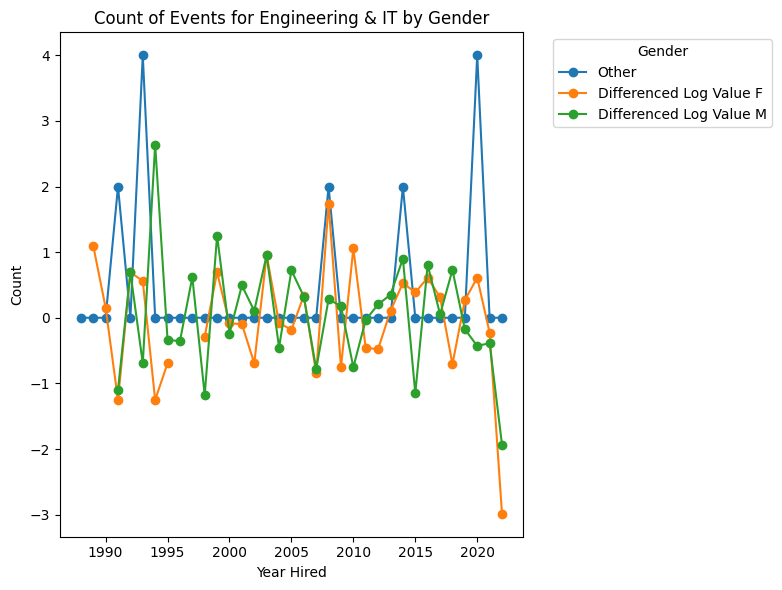

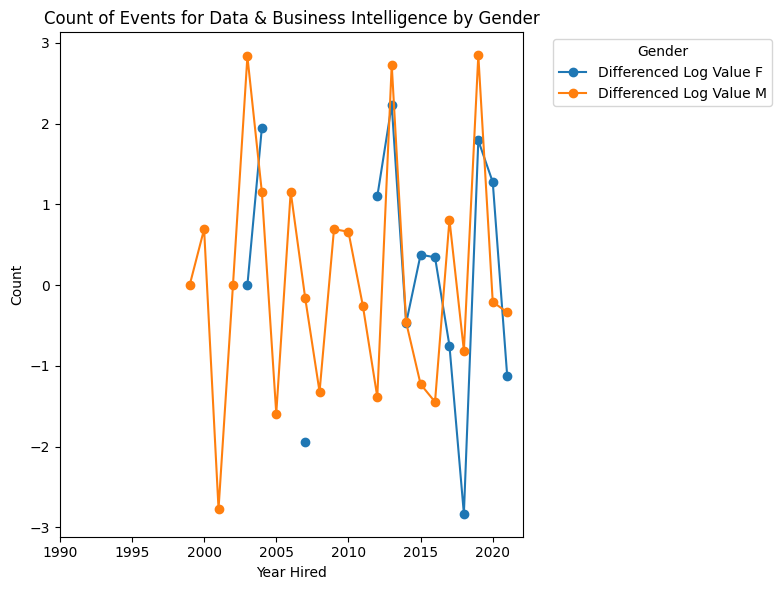

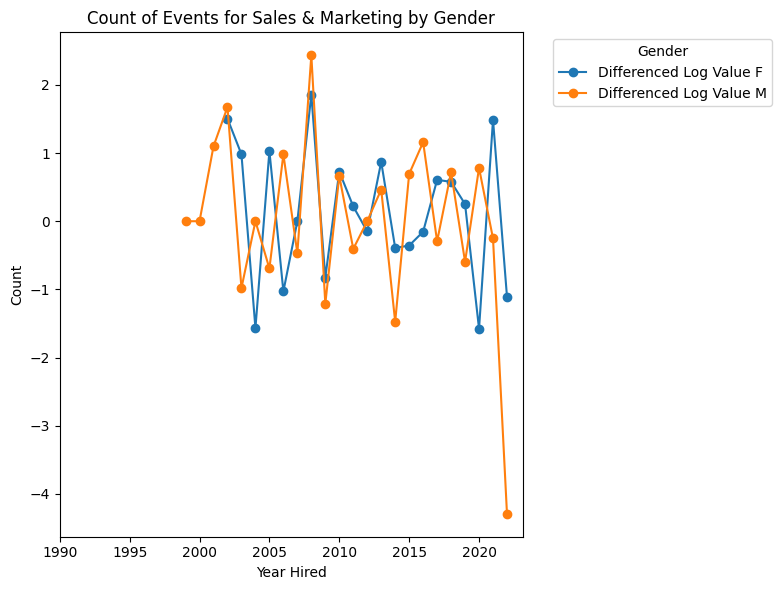

In [39]:
# Loop through each unique Job Category to create separate graphs
class LogTransformationHelper:
    def __init__(self, dataframe):
        """Initialize with the DataFrame."""
        self.df = dataframe

    def plot_industry_data(self):
        """Loop through industries and plot gender-based moving averages."""
        for industry in self.df['Job Category 2'].unique():
            pivoted = self._prepare_data(industry)
            self._plot_graph(pivoted, industry)

    def _prepare_data(self, industry):
        """Prepare and pivot the data for the given industry."""
        # Filter data for the current industry
        industry_data = self.df[self.df['Job Category 2'] == industry]
        # Group and count occurrences by Year Hired and Gender
        grouped = industry_data.groupby(['Year Hired', 'Gender']).size().reset_index(name='Count')
        # Pivot the data to have Gender as columns
        pivoted = grouped.pivot(index='Year Hired', columns='Gender', values='Count').fillna(0)
        # Calculate 5-period simple moving averages for Female and Male
        pivoted['5-SMA F'] = pivoted['Female'].rolling(window=5).mean()
        pivoted['5-SMA M'] = pivoted['Male'].rolling(window=5).mean()
        pivoted['5SMA LogValue F'] = np.log(pivoted['Female'])
        pivoted['5SMA LogValue M'] = np.log(pivoted['Male'])
        pivoted['Differenced Log Value F'] = pivoted['5SMA LogValue F'].diff()  # First-order differencing
        pivoted['Differenced Log Value M'] = pivoted['5SMA LogValue M'].diff()  # First-order differencing

        # Drop the original Female and Male columns
        return pivoted.drop(['Female', 'Male', '5-SMA M', '5-SMA F', '5SMA LogValue M', '5SMA LogValue F'], axis=1)

    def _plot_graph(self, pivoted, industry):
        """Plot the graph for the given industry."""
        # Plot the moving averages
        pivoted.plot(kind='line', marker='o', figsize=(8, 6))
        # Set labels, title, and legend
        plt.xlabel('Year Hired')
        plt.ylabel('Count')
        plt.title(f'Count of Events for {industry} by Gender')
        # Adjust x-axis ticks
        plt.xticks(ticks=range(1990, 2025, 5))
        # Set legend outside the plot
        plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
        # Ensure layout fits and display the plot
        plt.tight_layout()
        plt.show()
        return
    
plot_log_transformation = LogTransformationHelper(df)
plot_log_transformation.plot_industry_data()

#### **Summary**

- For all three industries we analysed the trend suggests that for both females and males hiring of freshers is in an upward trend.
- In Engineering industry we can clearly see a bias favouring male freshers throughout the time period we could examine.
- Similarly for Sales and Marketing except for ashort time period between 2007 to 2012 female freshers are favoured over male freshers.
- For Data and Business Intelligence industry till 2015 it was in favour of male freshers but the tables turned after that in favor of female freshers.

- One thing to note here is that since the dataset was actually a snapshot representing 2022 and one thing that we can also deduce is that experienced people are more in Engineering industry which explains the series beginning from 1990's. It is also possible that in the other two industries people retire earlier.